<a href="https://colab.research.google.com/github/dmika1234/ml_uwr_22/blob/develop/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 6

**Submission deadline:**
* **lab session in the week 28.11-2.12 2022**

**Points: 1+2+3=6 points**

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

In [1]:
!python3 -m pip install -q gdown httpimport

In [1]:
# Standard IPython notebook imports
import itertools
import io
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sopt
import scipy.stats as sstats
import seaborn as sns
import sklearn.ensemble
import sklearn.tree
from sklearn import datasets
from tqdm.auto import tqdm

import httpimport

# In this way we can import functions straight from github
with httpimport.github_repo(
    "janchorowski", "nn_assignments", module="common", branch="nn18"
):
    from common.gradients import check_gradient
    from common.plotting import plot_mat

sns.set_style("whitegrid")

In [2]:
# Repeat notebook initialization and data loading

import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Categorical(iris.target_names[iris.target])

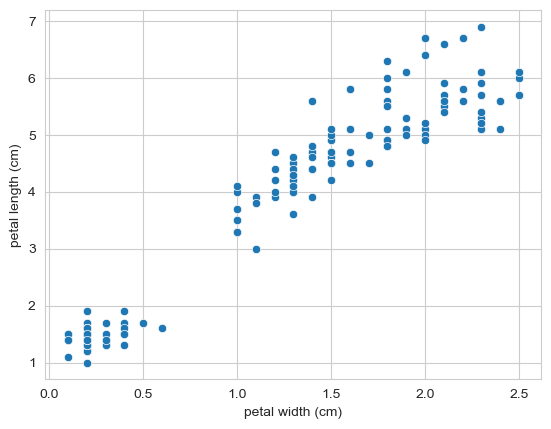

In [3]:
reg_feature='petal width (cm)'
reg_target='petal length (cm)'

# plot the length-widt relation
sns.scatterplot(x=reg_feature, y=reg_target, data=iris_df)
sns.set(rc={'figure.figsize':(8,8)})


# Problem 1 [1p] Linear Regression

In [4]:
class LinearRegression:
    #TODO fill the methods below
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.intercept_ = None
        self.coef_ = None
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.Theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_, self.coef_ = self.Theta[0], self.Theta[1:]
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        predicted = X @ self.Theta
        return predicted


In [5]:
X = iris_df[[reg_feature]]
y = iris_df[reg_target]

In [6]:
model = LinearRegression()
model.fit(X,y)

In [7]:
model.Theta

array([1.08355803, 2.2299405 ])

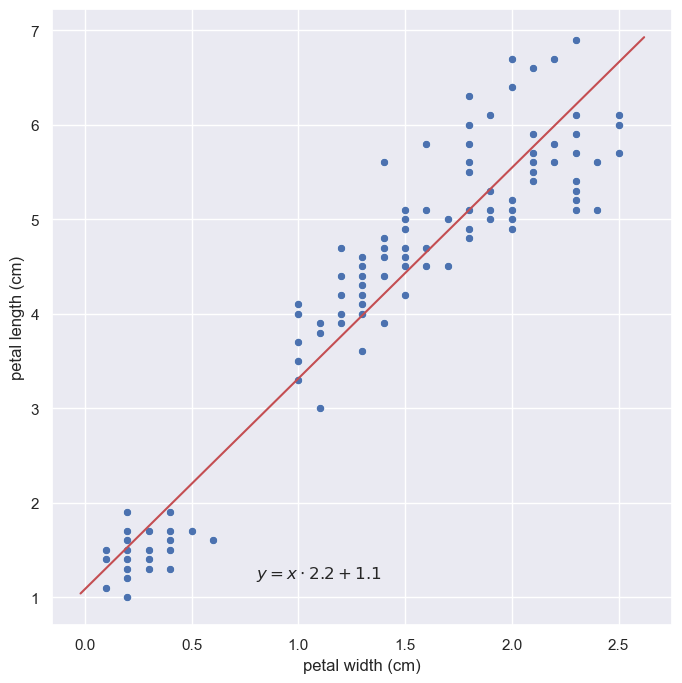

In [8]:
# plot the length-widt relation
sns.scatterplot(x=reg_feature, y=reg_target, data=iris_df)
sns.set(rc={'figure.figsize':(8,8)})

# plot the proposed relationship
length_bounds = np.array(plt.xlim())
width_predictions = model.Theta[1] * length_bounds + model.Theta[0]

plt.plot(length_bounds, width_predictions, color='r')
_ = plt.text(0.8, 1.2, f"$y = x \cdot {float(model.Theta[1]):0.2} + {float(model.Theta[0]):0.2}$")

# Problem 2 PolyRegression

Consider the following dataet which is created by the following probabilistic model:



1. $x \sim U[0,1]$: first $x$ is sampled uniformly from the  $[0,1]$ range.
2. $y \sim 1+2x-5x^2 + 4x^3 + \mathcal{N}(\mu=0, \sigma=0.1)$: then 
    $y$ is a polynomial of $x$ plus random noise sampled from the Normal distribution with mean 
    $\mu=0$ and standard deviation $0.1$


In [6]:
#
# The true polynomial relation:
# y(x) = 1 + 2x -5x^2 + 4x^3
#

true_poly_theta = np.array(
    [1.0, 2.0, -5, 4]
)

def powers_of_X(X, degree):
    powers = np.arange(degree + 1).reshape(1, -1)
    return X ** powers


def compute_polynomial(X, Theta):
    XP = powers_of_X(X, len(Theta) - 1)  
    Y = XP @ Theta.reshape(-1, 1)  
    return Y

def make_dataset(N, theta=true_poly_theta, sigma=0.1):
    """ Sample a dataset """
    X = np.random.uniform(size=(N, 1))
    Y_clean = compute_polynomial(X, theta)
    Y = Y_clean + np.random.randn(N, 1) * sigma
    return X, Y



np.random.seed(0)
train_data = make_dataset(30)


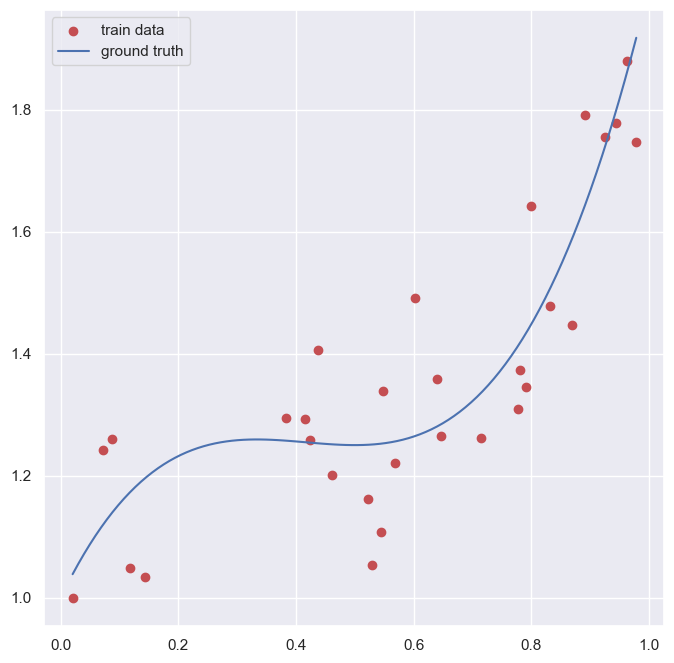

In [7]:
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
YY = compute_polynomial(XX, true_poly_theta)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.legend(loc="upper left")

## Problem 2.1 [1p] Implement class `PolynomialRegression` numerically unstable

Directly apply the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ as in the iris case, which fits a polynomial of a given degree. Use `np.linalg.inv` as the inverse operator. The output may be numerically unstable and may look as below.

In [8]:
class PolynomialRegressionUnstable:
    #TODO fill the methods below
    def __init__(self, deg):
        self.deg = deg
        self.Theta = None
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        X = powers_of_X(X, self.deg)
        self.Theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_, self.coef_ = self.Theta[0], self.Theta[1:]
    def predict(self, X):
        X = powers_of_X(X, self.deg)
        predicted = X @ self.Theta
        return predicted


In [9]:
def mse(y_true, y_pred):
    return ((y_pred - y_true)**2).mean()

MSE: 4.622567984149447


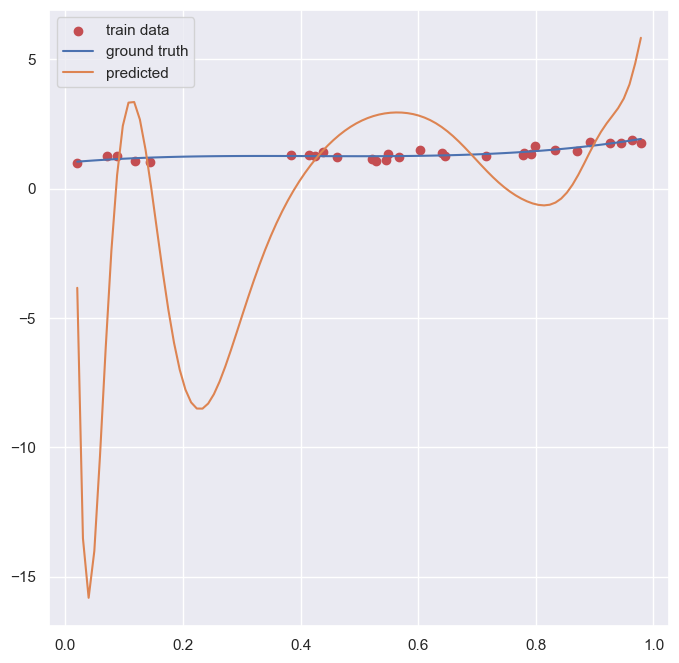

In [48]:
X, y = train_data[0], train_data[1]

model = PolynomialRegressionUnstable(deg=50)
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:", mse(y, y_pred))
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)

plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

The above plot shouldn't look like that --- since we have 30 points and a polynomial of degree 50, it should fit points almost perfectly. Still, it's quite clear that too big of a degree overfits the data.

## Problem 2.2 [1p] Implement class `PolynomialRegression` numerically stable

In the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ the expression $$(X^T X) ^{-1} X^T $$ is sometimes called the Moore-Penrose Inverse. Computing it directly can sometimes be problematic due to numerical errors, but there are dedicated functions that compute it better.
Hence, apply the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ but this time use `np.linalg.pinv`, i.e., the Moore-Penrose inverse directly. The output should be more like the one below.

In [10]:
class PolynomialRegressionStable:
    #TODO fill the methods below
    def __init__(self, deg):
        self.deg = deg
        self.Theta = None
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        X = powers_of_X(X, self.deg)
        self.Theta = np.linalg.pinv(X.T @ X) @ X.T @ y
        self.intercept_, self.coef_ = self.Theta[0], self.Theta[1:]
    def predict(self, X):
        X = powers_of_X(X, self.deg)
        predicted = X @ self.Theta
        return predicted

In [44]:
X, y = train_data[0], train_data[1]

model = PolynomialRegressionStable(deg=50)
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:", mse(y, y_pred))

MSE: 0.00546887746880254


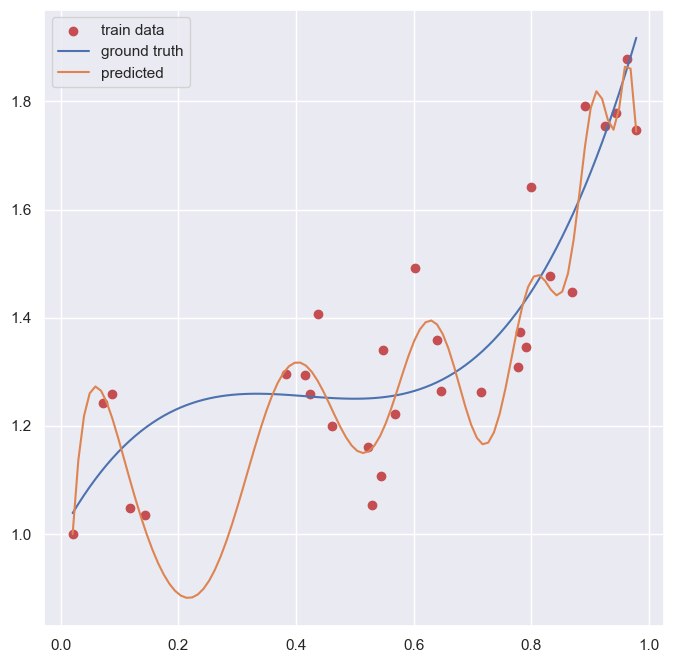

In [45]:
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)

plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

# Problem 3 Regularized PolyRegression

As you can see above, the polynomial regression is prone to overfitting.
One way of dealing with it is Ridge type of regularization. 
In this case the function which measures the fitness of the model is

$$ J_{\mbox{reg}}(\Theta) = \frac{1}{N}\sum_{i=1}^N (y^{(i)} - x^{(i)}\Theta)^2 +  \frac{\alpha}{N} \sum_j \Theta_j^2 = \text{MSE} + \text{Regularization}$$



## Problem 3.1 [1p] Closed form solution for $\Theta$

Without the regularization the closed form formula for $\Theta$ was $\Theta = (X^T X) ^{-1} X^T Y$ as shown during the lecture. Adopt the same line of math to get the closed form formula for $\Theta$ which minimizes $J_{\mbox{reg}}$.

## Problem 3.2 [1p] Implement PolyRidgeRegression

**Remark** use the `np.linalg.inv` cause the Moore-Penrose `np.linalg.pinv` is hard to apply here. We may allow for numerical unstability here, because the regularization term will fix a bit the problems itself. So use similar code as in `PolynomialRegressionUnstable`.

In [11]:
class PolyRidgeRegression:
    #TODO fill the methods below
    #TODO dont use sklearn
    def __init__(self, deg, alpha):
        self.deg = deg
        self.alpha = alpha
        self.Theta = None
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        X = powers_of_X(X, self.deg)
        self.Theta = np.linalg.inv(X.T @ X + self.alpha * np.eye(X.shape[1])) @ X.T @ y
        self.intercept_, self.coef_ = self.Theta[0], self.Theta[1:]
    def predict(self, X):
        X = powers_of_X(X, self.deg)
        predicted = X @ self.Theta
        return predicted


In [12]:
X, y = train_data[0], train_data[1]

MSE: 4.622567984149447


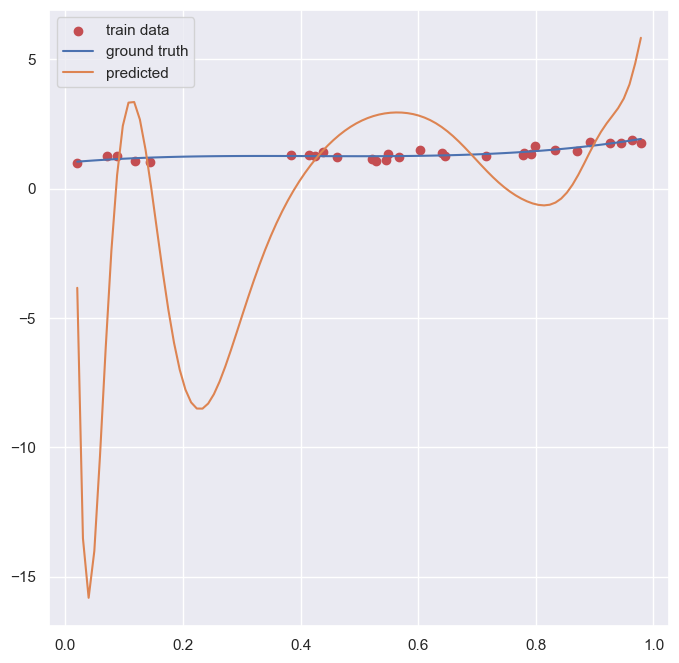

In [54]:
model = PolyRidgeRegression(deg=50, alpha=0)    #with alpha=0 it's without the regularization, 
                                                #and you can see that in fact it also overfits in this case
                                                #although not as much as it would if it would be numerically stable
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

MSE: 0.01506703461516034


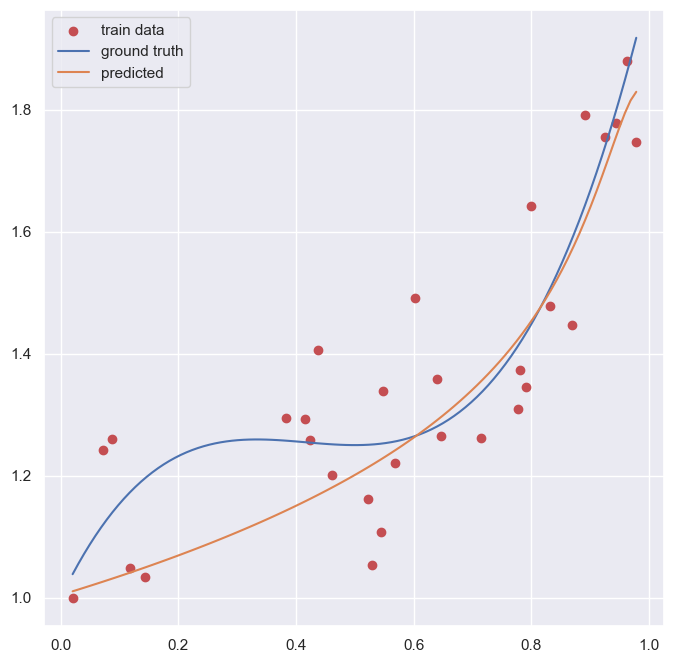

In [56]:
model = PolyRidgeRegression(deg=50, alpha=1.) #with alpha=1 you can see already a better fit 
                                             
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

## Problem 3.3 [1p] finding best alpha and degree

Perform leave one out error estimation on the `train_data` to get the best $(d, \alpha)$ pair out of $\alpha \in \{0., 0.1, 0.5, 1., 5, 10, 50, 100, 500\}$ and $d \in \{1, 2, 4, 16, 32, 64\}$. The the error is measured via MSE.

MSE: 1.4981916798828185


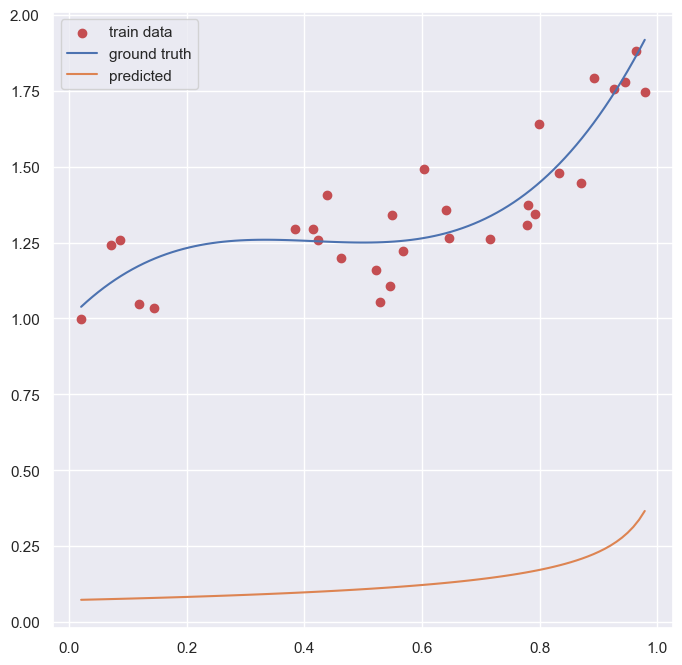

In [57]:
model = PolyRidgeRegression(deg=64, alpha=500)
                                             
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

In [13]:
def poly_ridge_loo(X, y, deg, alpha):
    n = len(y)
    y_pred_vec = np.zeros(n)
    model = PolyRidgeRegression(deg=deg, alpha=alpha)
    for i in range(n):
        X_train, y_train = np.delete(X, i, axis=0), np.delete(y, i)
        model.fit(X_train, y_train)
        y_pred_vec[i] = model.predict(X[i])
    mse_val = mse(y, y_pred_vec)
    return mse_val


In [14]:
alphas = [0., 0.1, 0.5, 1., 5, 10, 50, 100, 500]
degs = [1, 2, 4, 16, 32, 64]
params = np.array(np.meshgrid(degs, alphas)).T.reshape(-1, 2)
results = np.column_stack((params, np.zeros(params.shape[0])))
ix = 0
for deg, alpha in tqdm(params):
    results[ix, 2] = poly_ridge_loo(X, y, deg=deg, alpha=alpha)
    ix += 1

100%|██████████| 54/54 [00:00<00:00, 86.70it/s] 


In [15]:
results[results.argmin(axis=0)[2]]

array([1.        , 1.        , 0.08912566])